# Exploratory data anlysis


### **Phase 1: Data Summarization**
- **Descriptive Statistics:** Calculate metrics like mean, median, standard deviation for numerical features such as `TotalPremium` and `TotalClaim` to understand data variability.
- **Data Structure:** Review the `dtype` of each column to ensure categorical variables, dates, and other types are correctly formatted.

### **Phase 2: Univariate Analysis**
- **Distribution of Variables:** Plot histograms for numerical columns and bar charts for categorical columns to assess the distribution of individual variables.

### **Phase 3: Bivariate/Multivariate Analysis**
- **Correlations and Associations:** Use scatter plots and correlation matrices to explore relationships between `TotalPremium`, `TotalClaim`, and `ZipCode`.
- **Data Comparison:** Analyze trends over geography by comparing insurance cover type, premium, and auto make.

### **Phase 4: Data comparison**
- **Line graphs** used to compare performance across time and different provinces.

### **Phase 5: Outlier Detection**
- **Box Plots:** Use box plots to detect outliers in the numerical data.

### **Phase 6: Visualization**
- **Creative Plots:** Generate 3 insightful and visually appealing plots to highlight key findings from the EDA.

This structure provides a clear roadmap for performing the EDA in logical phases.

In [50]:
import pandas as pd
df=pd.read_csv('../dvc/data/dataset.csv')

C:\Users\Beab\AppData\Local\Temp\ipykernel_13400\3796762694.py:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../dvc/data/dataset.csv')


In [51]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
4,145247,12827,2015-04-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,50.474737,0.0


In [52]:
print(df.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


### Phase 1: Data summarization

In [53]:
import numpy as np

# List of numerical columns
numerical_columns = [ 'Cylinders','cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate',
                     'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims', 'NumberOfVehiclesInFleet',]

# Convert improperly formatted numeric strings to proper float values
# Iterate over each numerical column and handle strings that might have commas or wrong formats
for col in numerical_columns:
    # Check if the column contains string values
    if df[col].dtype == 'object':
        # Replace commas used as decimal separators with dots and remove spaces
        df[col] = df[col].str.replace(',', '.').str.replace(' ', '').astype(float)

# Calculate descriptive statistics after cleaning
descriptive_stats = df[numerical_columns].describe()

# Display the improved descriptive statistics
print(descriptive_stats)


           Cylinders  cubiccapacity      kilowatts  NumberOfDoors  \
count  586200.000000  586200.000000  586200.000000  586200.000000   
mean        4.044326    2516.177373      98.170459       3.985002   
std         0.255002     253.686283      18.135696       0.416596   
min         4.000000    1584.000000      58.000000       0.000000   
25%         4.000000    2237.000000      75.000000       4.000000   
50%         4.000000    2694.000000     111.000000       4.000000   
75%         4.000000    2694.000000     111.000000       4.000000   
max         6.000000    3198.000000     165.000000       6.000000   

       CustomValueEstimate     SumInsured  CalculatedPremiumPerTerm  \
count         5.862000e+05  586200.000000             586200.000000   
mean          4.958159e+04   27336.316688                 24.060781   
std           2.731526e+05   91612.788364                 41.380467   
min           0.000000e+00       0.010000                  0.000000   
25%           0.000000e

In [54]:
# Display the unique values and their counts in 'NumberOfVehiclesInFleet' and 'TotalClaims' columns

# For 'NumberOfVehiclesInFleet' column
fleet_values = df['NumberOfVehiclesInFleet'].value_counts().sort_index()

# For 'TotalClaims' column
claims_values = df['TotalClaims'].value_counts().sort_index()

# Display the results
print("Unique values and their counts in 'NumberOfVehiclesInFleet':\n")
print(fleet_values)

print("\nUnique values and their counts in 'TotalClaims':\n")
print(claims_values)


Unique values and their counts in 'NumberOfVehiclesInFleet':

NumberOfVehiclesInFleet
0.0    586200
Name: count, dtype: int64

Unique values and their counts in 'TotalClaims':

TotalClaims
-635.480000           1
-256.350000           1
-72.000000            1
 0.000000        585342
 170.657895           2
                  ...  
 11333.600000         1
 12307.350877         1
 13224.596491         1
 16708.771930         1
 17752.201754         1
Name: count, Length: 291, dtype: int64


In [55]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145247,12827,2015-01-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,3.256435,0.0
4,145247,12827,2015-04-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,50.474737,0.0


In [58]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'RegistrationYear' to datetime format by adding '-01-01' to represent January 1st of that year
df['RegistrationYear'] = pd.to_datetime(df['RegistrationYear'], format='%Y')

# Convert 'TransactionMonth' to proper datetime format (this will automatically parse it)
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m-%d %H:%M:%S')

# To display the converted columns and check the output
print(df[['RegistrationYear', 'TransactionMonth']].head())


  RegistrationYear TransactionMonth
0       2004-01-01       2015-03-01
1       2004-01-01       2015-05-01
2       2004-01-01       2015-07-01
3       2004-01-01       2015-01-01
4       2004-01-01       2015-04-01


In [59]:
import pandas as pd

# Assuming df is your DataFrame

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns.tolist())


Categorical Columns:
['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


In [61]:
df.to_csv('../dvc/data/dataset.csv',index=False)

### Phase 2: Univariate analysis

### Univariate Analysis: Distribution of Variables

In this code block, we perform univariate analysis to understand the distribution of variables in the DataFrame `df`. We visualize the distributions of both numerical and categorical columns using appropriate plots.

1. **Numerical Columns**:
   - We use histograms to plot the distribution of numerical variables.
   - Each subplot represents one numerical column and shows the frequency of values within different bins.
   - This helps us understand the spread and central tendency of each numerical variable.

2. **Categorical Columns**:
   - We use bar charts to plot the distribution of categorical variables.
   - Each subplot shows the count of each category within the column.
   - This visualization helps us understand the frequency distribution of categorical data.

**Key Steps**:
- We use the `matplotlib` and `seaborn` libraries to create the plots.
- Histograms are plotted for numerical columns, while bar charts are plotted for categorical columns.
- The plots are arranged in a grid layout for better readability, with titles and labels for clarity.

This analysis provides insights into the distribution of data, helping in understanding the dataset's characteristics and guiding further data processing steps.


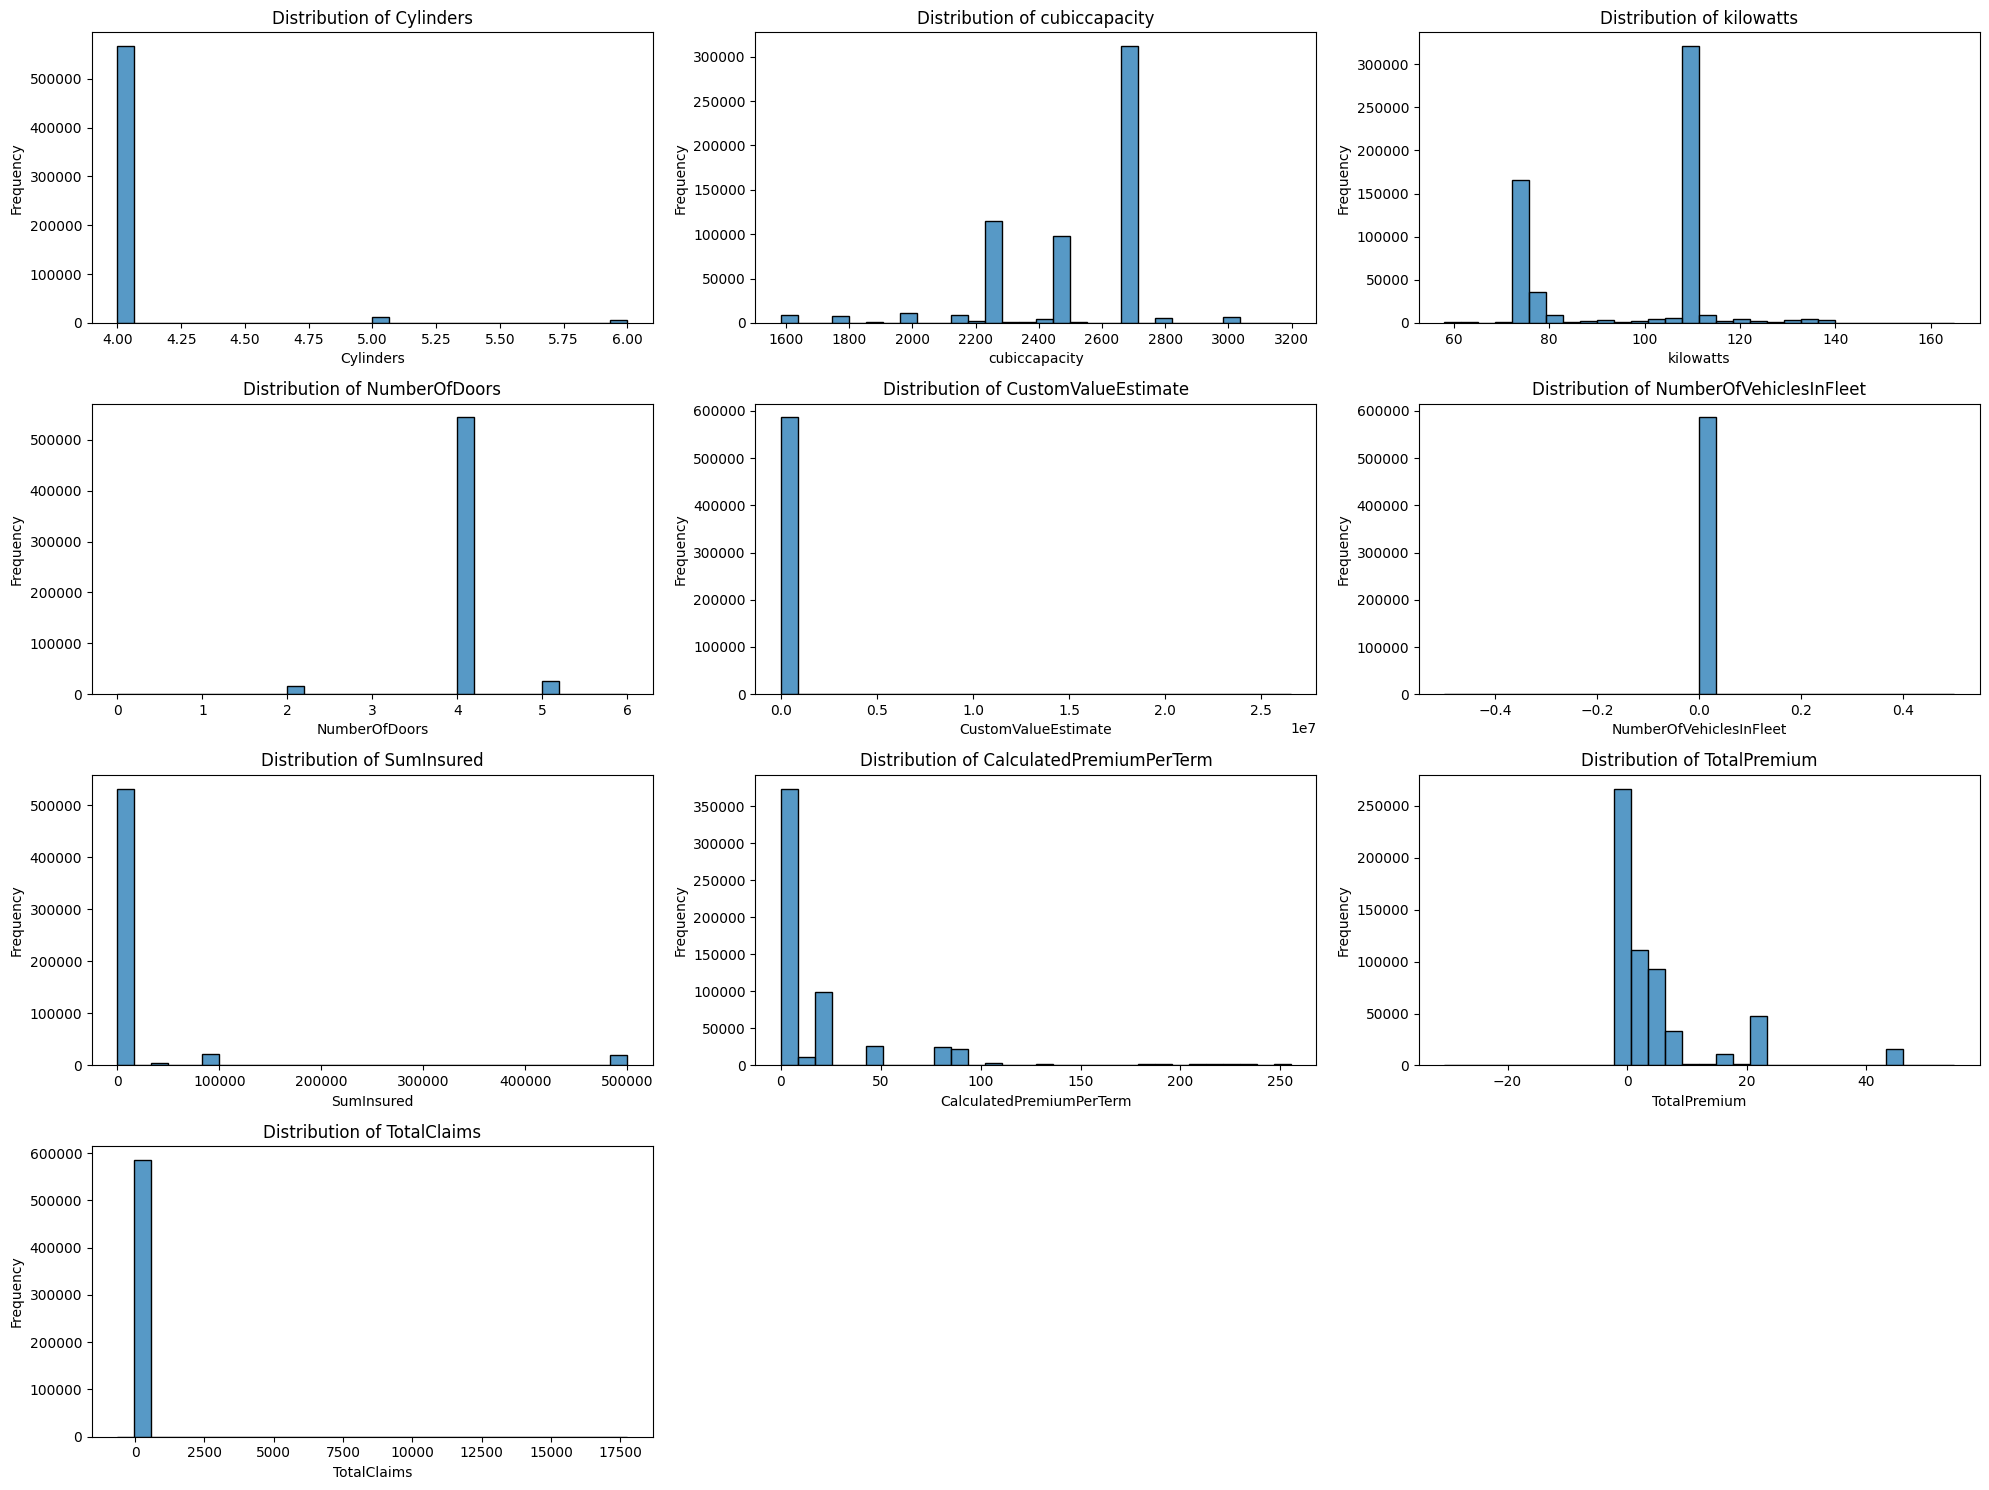

C:\Users\Beab\AppData\Local\Temp\ipykernel_13400\1688722225.py:46: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(pad=6.0)  # Increase padding between subplots


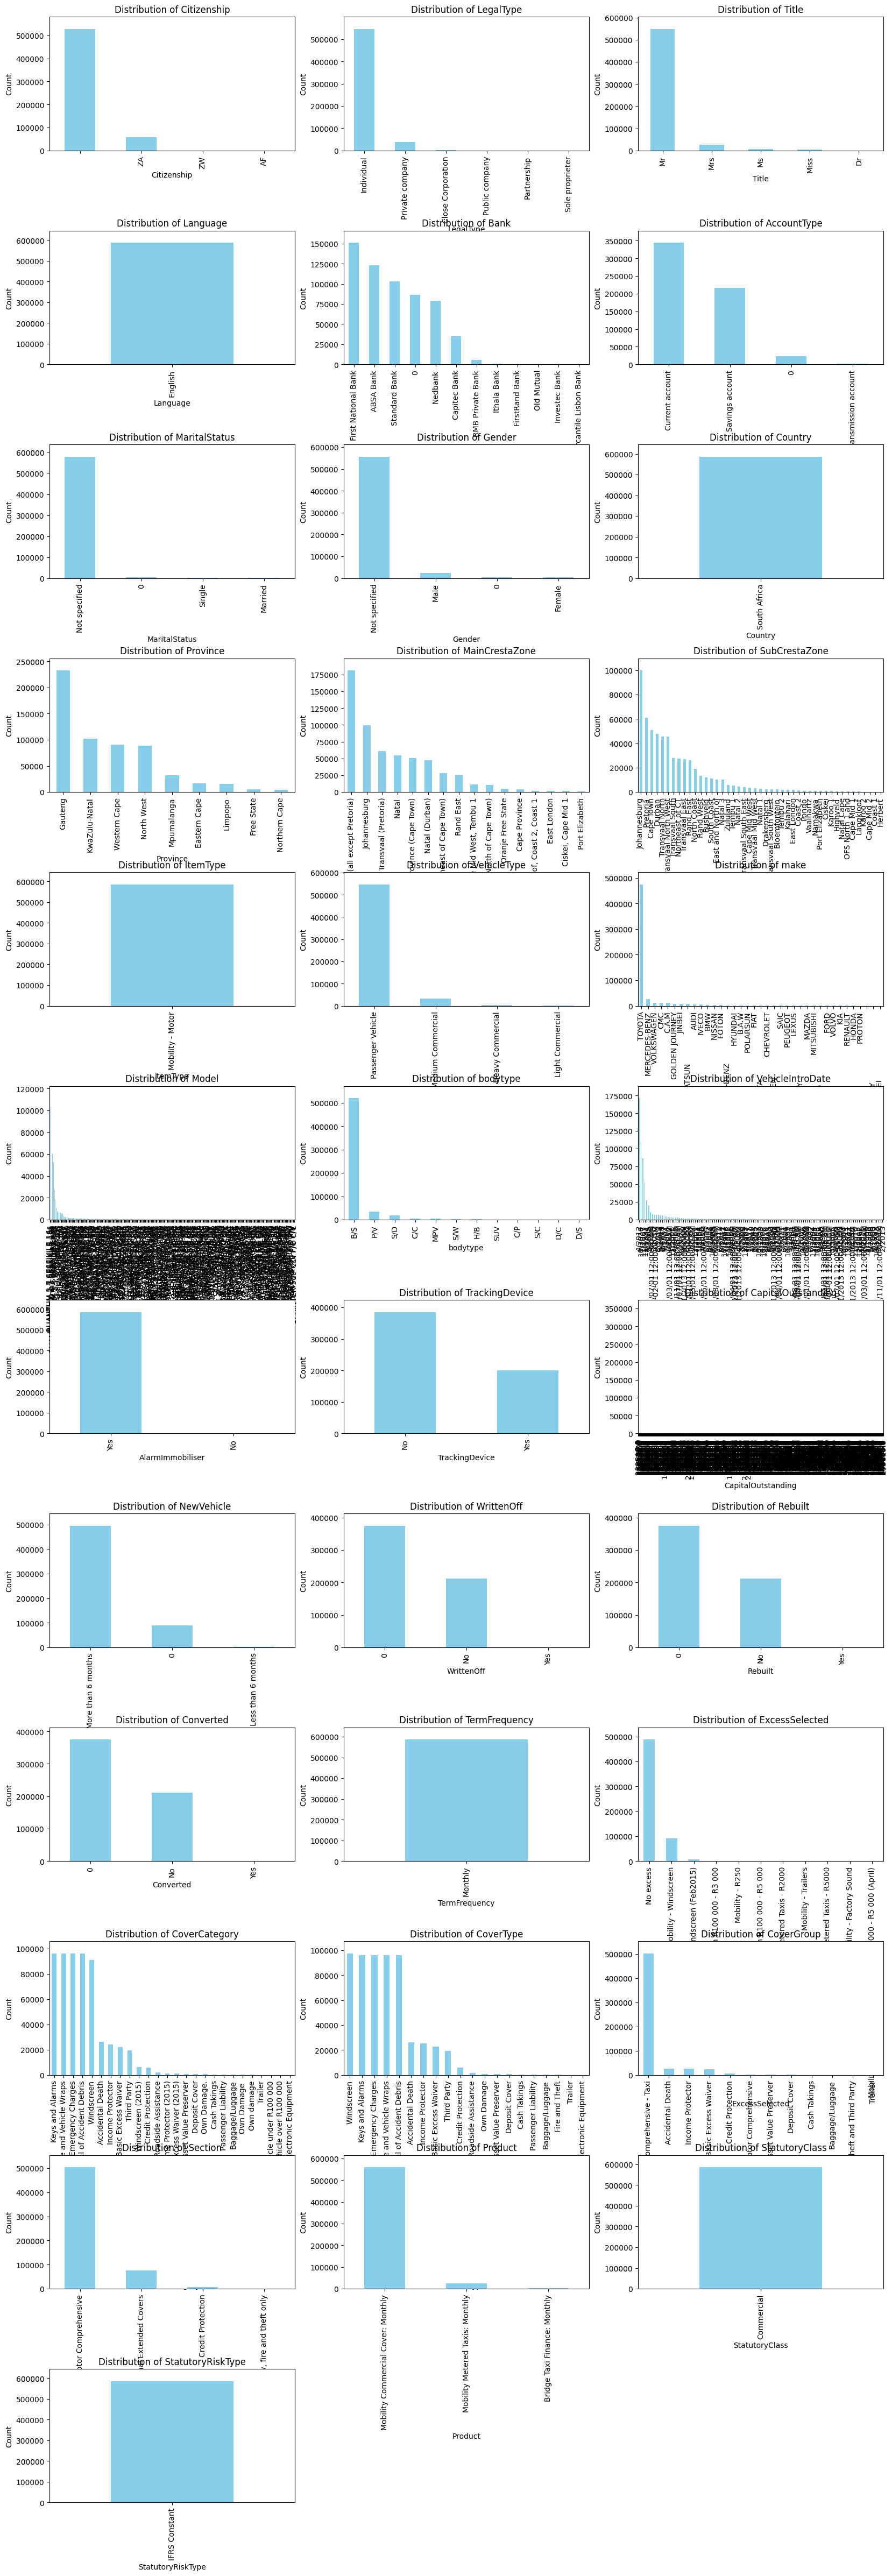

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical and categorical columns
numerical_columns = ['Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 
                      'CustomValueEstimate', 'NumberOfVehiclesInFleet', 
                      'SumInsured', 'CalculatedPremiumPerTerm', 
                      'TotalPremium', 'TotalClaims']

categorical_columns = ['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 
                       'AccountType', 'MaritalStatus', 'Gender', 'Country', 
                       'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 
                       'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 
                       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
                       'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 
                       'TermFrequency', 'ExcessSelected', 'CoverCategory', 
                       'CoverType', 'CoverGroup', 'Section', 'Product', 
                       'StatutoryClass', 'StatutoryRiskType']

# Plot histograms for numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)  # Adjust the grid size based on the number of numerical columns
    sns.histplot(df[column].dropna(), kde=False, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot bar charts for categorical columns with more space for readability
n_cols = 3  # Number of columns in the grid for categorical plots
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

plt.figure(figsize=(20, 5 * n_rows))  # Increase figure height for better spacing
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create subplots
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
    plt.ylim(0, value_counts.max() * 1.1)  # Adjust y-axis limit for better visibility

plt.tight_layout(pad=6.0)  # Increase padding between subplots
plt.subplots_adjust(hspace=0.6)  # Adjust spacing between rows
plt.show()


### Phase 3: Bivariate/Multivariate Analysis
- **Correlations and Associations:** 
- **Data Comparison:** 

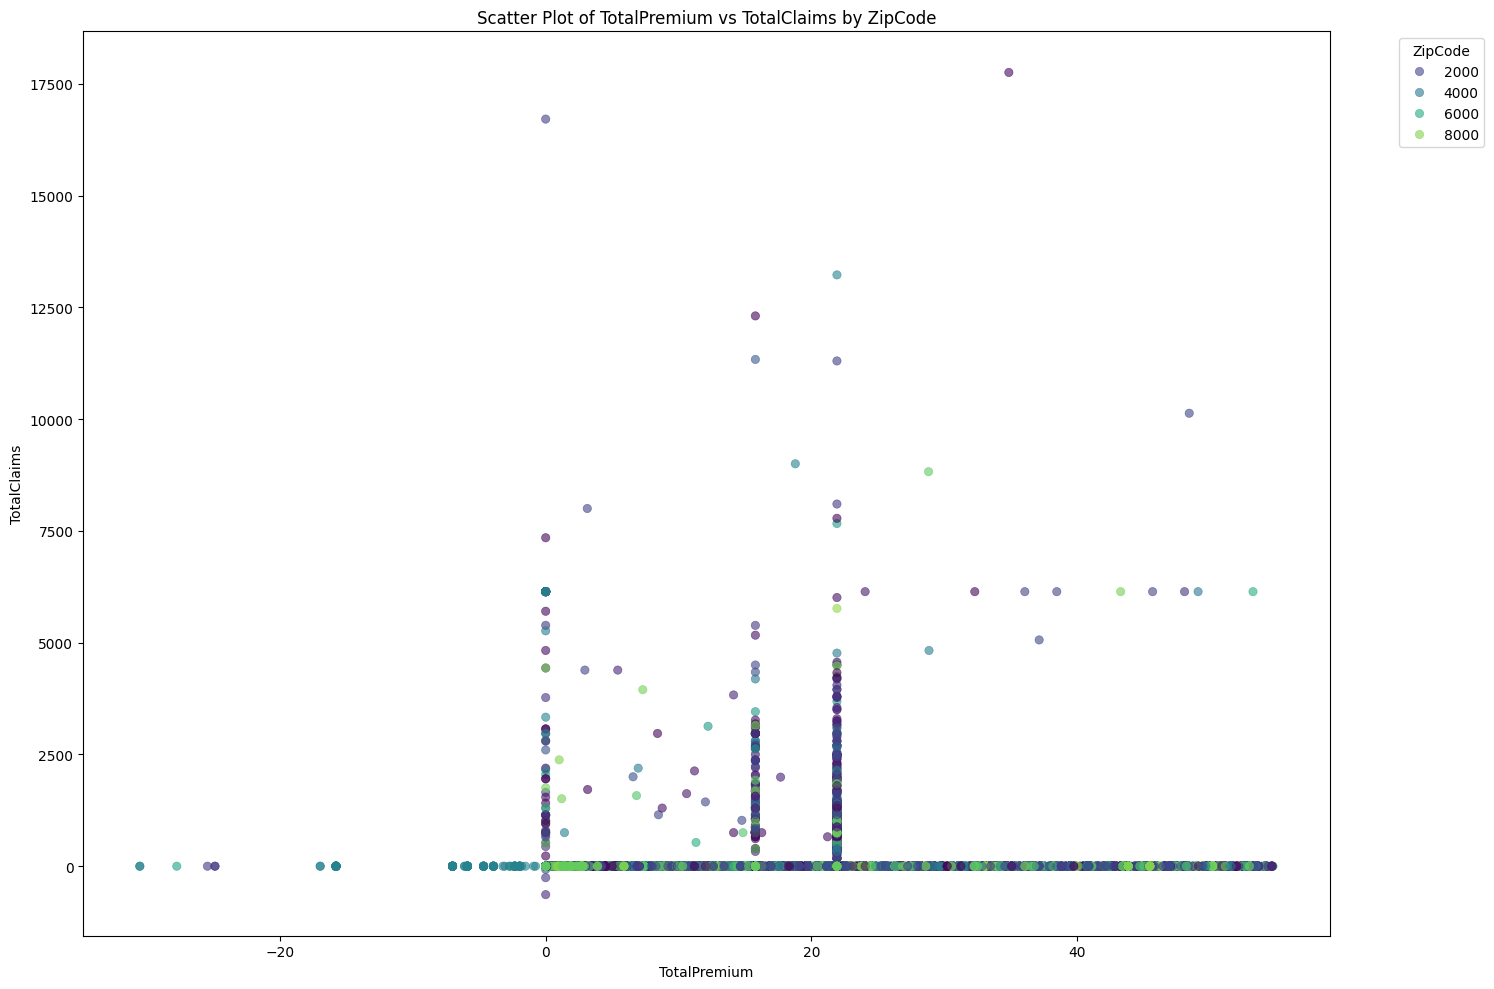

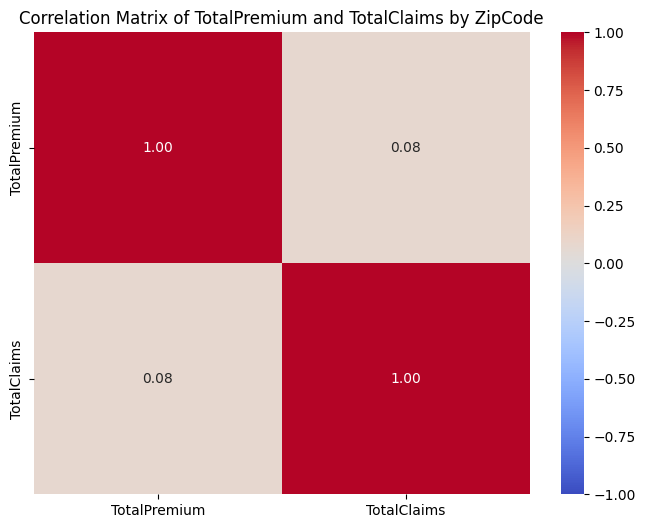

In [67]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual DataFrame name if it's different

# Scatter Plot of TotalPremium vs TotalClaims for different ZipCode values
plt.figure(figsize=(15, 10))

# Scatter plot with a unique color for each ZipCode
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='viridis', alpha=0.6, edgecolor=None)
plt.title('Scatter Plot of TotalPremium vs TotalClaims by ZipCode')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='ZipCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation Matrix
# First, we need to aggregate the data to analyze correlations at the ZipCode level
# Calculate the mean TotalPremium and TotalClaims for each ZipCode
agg_df = df.groupby('PostalCode').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean'
}).reset_index()

# Calculate correlation matrix
correlation_matrix = agg_df[['TotalPremium', 'TotalClaims']].corr()

# Plot Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of TotalPremium and TotalClaims by ZipCode')
plt.show()


**Interpretation of the scatterplot**
The scatter plot shows the relationship between "TotalPremium" and "TotalClaims" across different zip codes, represented by distinct color groupings. Most data points are concentrated around a "TotalPremium" value of 0, with a wide spread in the "TotalClaims" values. This suggests that for many data points, even with low or no premiums, there are varying claim amounts, including some reaching up to 17,500. The zip codes (represented by colors) appear to be relatively spread across the claims but without a distinct separation or pattern based on the zip code alone.

Outliers in the graph include negative "TotalPremium" values and higher claims, which may indicate data errors or unusual cases in the dataset. Additionally, there are distinct clusters at certain premium levels (e.g., around 20 and 40), where claims are more densely populated across all zip codes. These clusters suggest that specific premium values correlate with a higher number of claims, although this is not consistent across all zip codes. Further investigation into these clusters might provide more insights.


**Interpretation of the above correlation matrix**
The correlation matrix shows the relationship between "TotalPremium" and "TotalClaims." A correlation value of 1.00 on the diagonal indicates that "TotalPremium" and "TotalClaims" are perfectly correlated with themselves. However, the off-diagonal values show the correlation between "TotalPremium" and "TotalClaims," which is only 0.08. This low value suggests a very weak positive linear relationship between the two variables, meaning that an increase in "TotalPremium" does not strongly predict an increase in "TotalClaims."

The heatmap's color gradient reinforces this weak correlation, as the light color between "TotalPremium" and "TotalClaims" contrasts with the deep red of the self-correlations. In practical terms, this weak relationship implies that premium amounts and claim amounts are not closely related in this dataset, which could warrant further investigation into other factors that may drive claim amounts.


### Phase 4: Data comparison
### Data Comparison: Trends Over Geography

#### 1. Distribution of Insurance Cover Types by Province
This plot visualizes how different insurance cover types are distributed across various provinces. It uses a bar chart with different colors representing different provinces. This helps in understanding regional preferences or variations in insurance cover types.

#### 2. Trend of Average Total Premium Over Time by Province
This line plot shows how the average total premium changes over time for different provinces. It aggregates the `TotalPremium` by month and province, and then plots these trends to observe how premiums fluctuate seasonally or over time in various regions.

#### 3. Distribution of Auto Makes by Province
This plot visualizes the distribution of different auto makes across provinces. It uses a horizontal bar chart where each bar represents the count of vehicles for each make, colored by province. This helps in understanding the popularity of different auto makes in various regions.

**Key Steps**:
1. **Insurance Cover Types**: Counts and visualizes distribution by province.
2. **Premium Trends**: Shows changes in average premium over time, differentiated by province.
3. **Auto Makes**: Compares the frequency of different auto makes by province.

These visualizations provide insights into geographic trends and distributions in the insurance data, helping identify regional patterns and preferences.


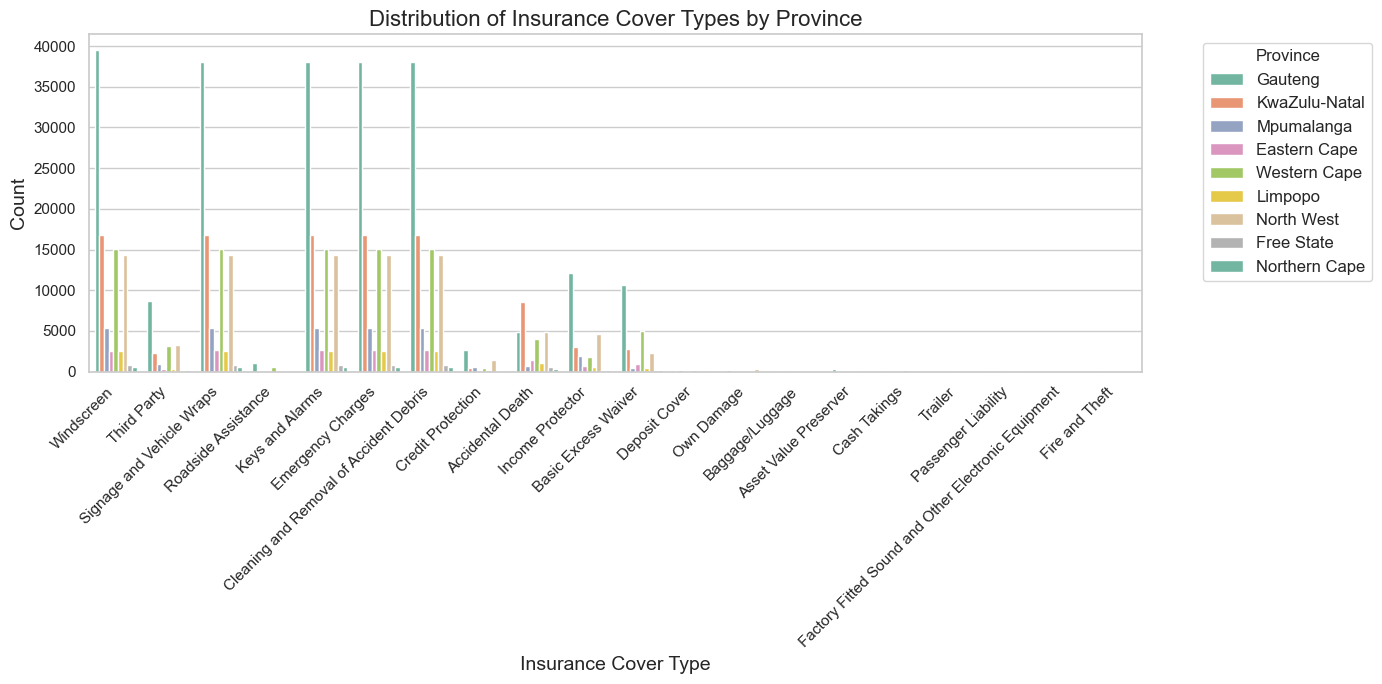

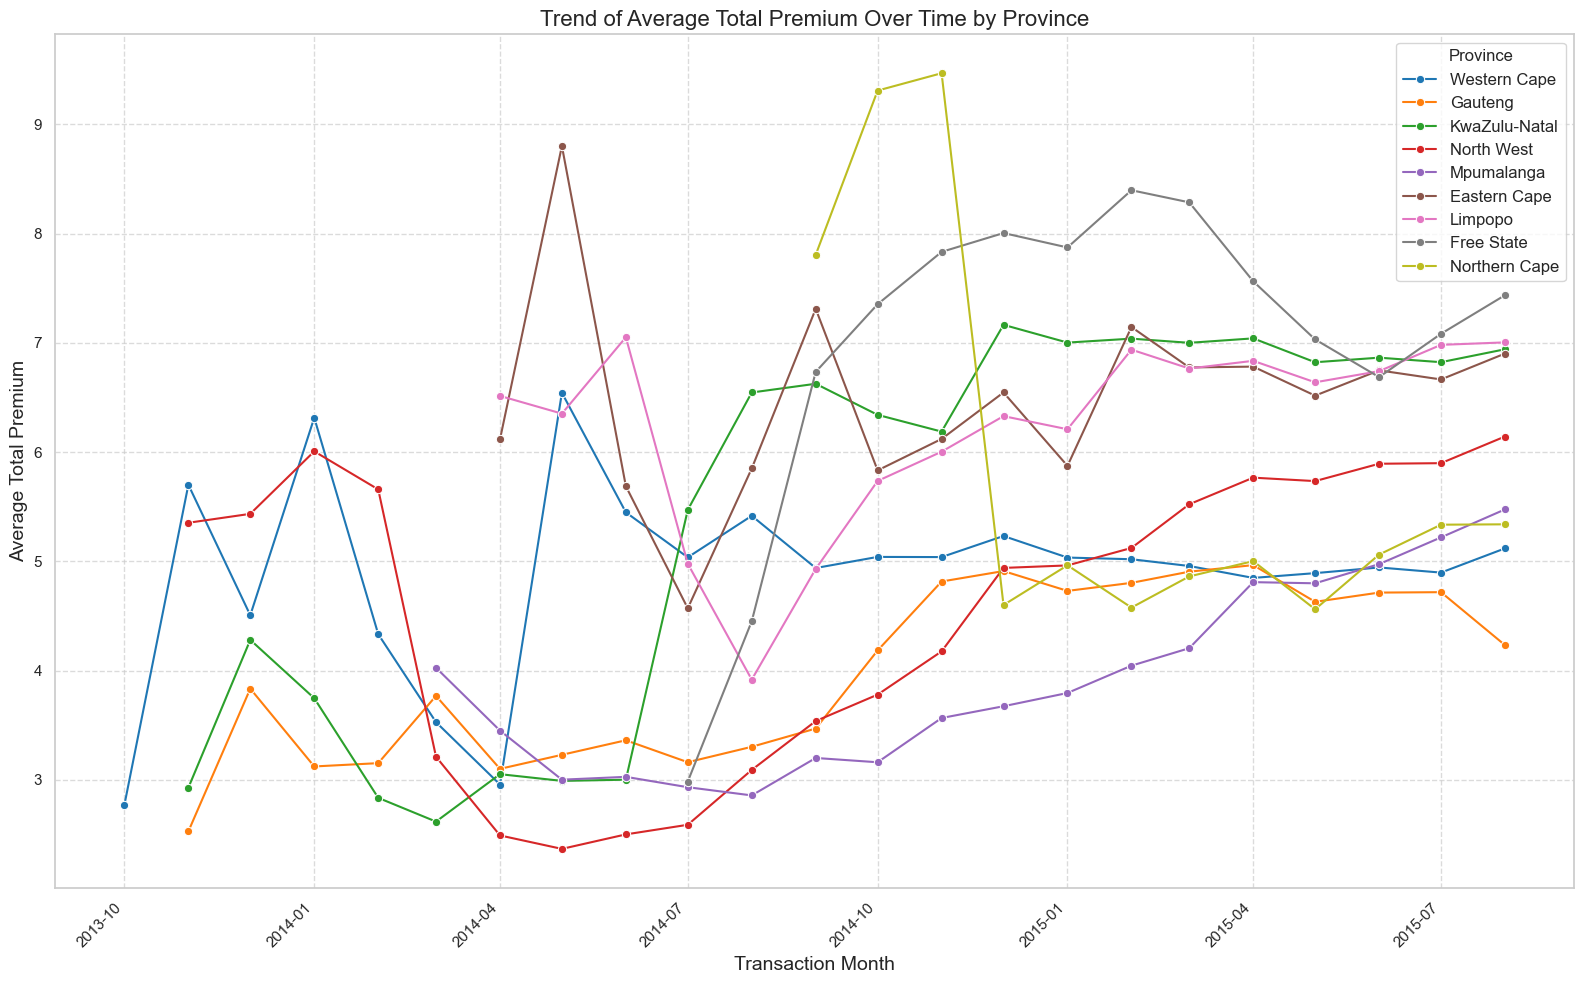

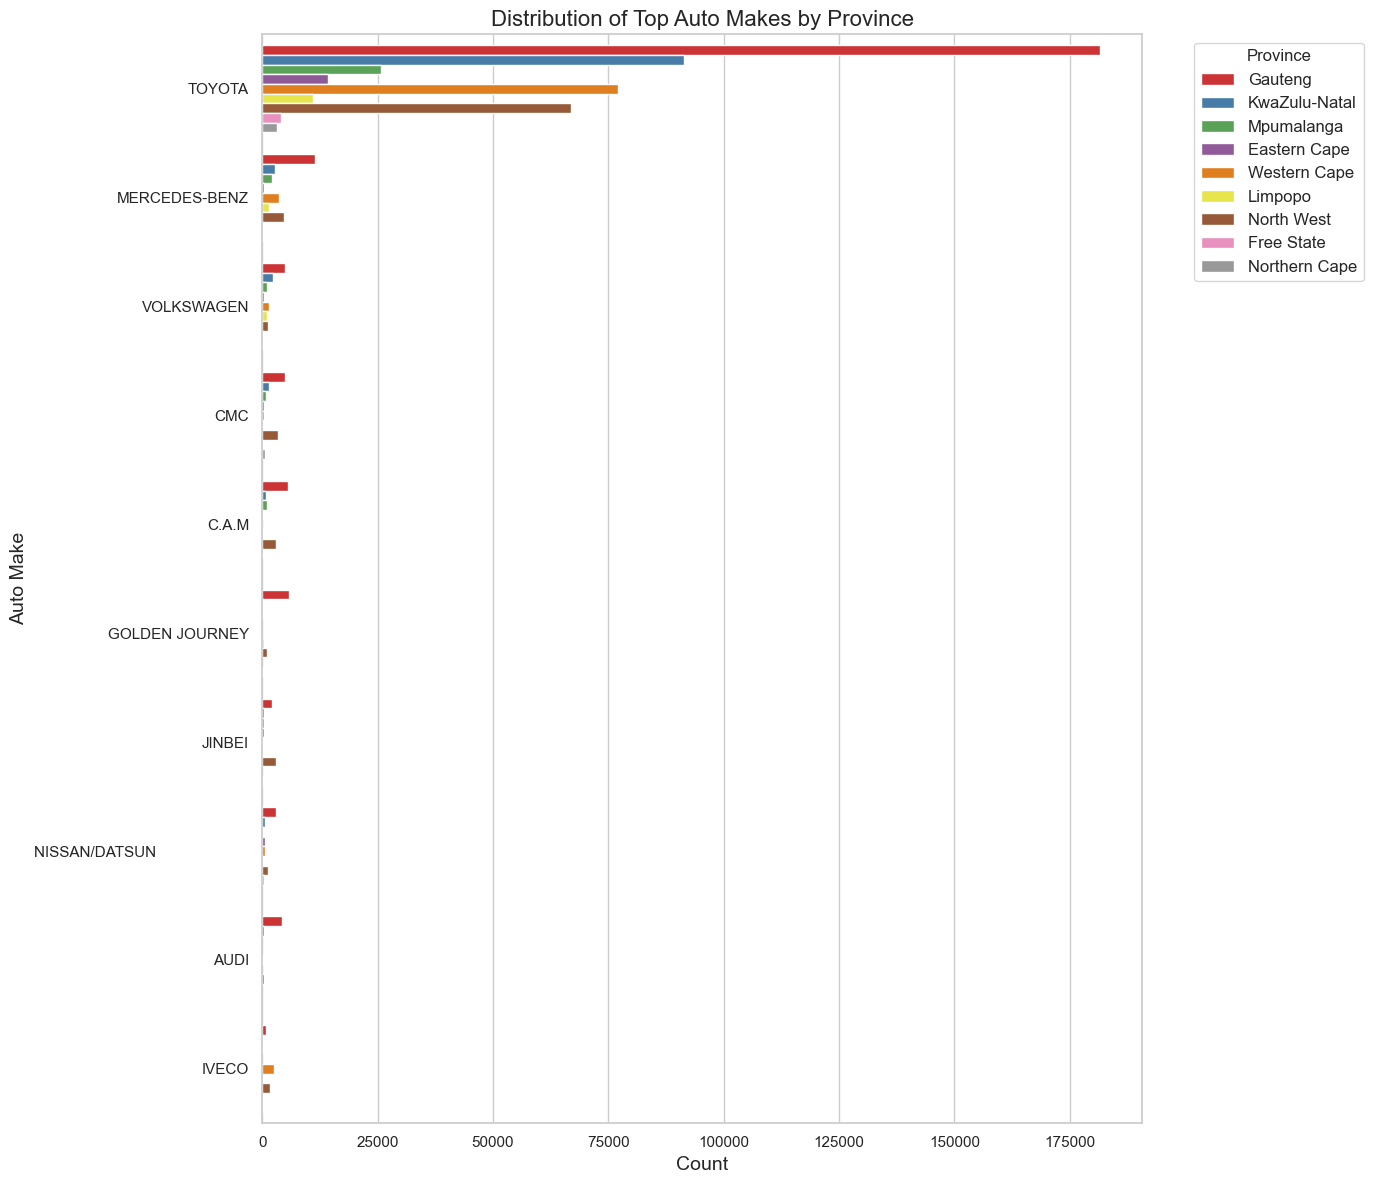

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual DataFrame name if it's different

# Set up the plotting aesthetics
sns.set(style="whitegrid")

# 1. Compare Insurance Cover Types by Province
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='CoverType', hue='Province', palette='Set2')
plt.title('Distribution of Insurance Cover Types by Province', fontsize=16)
plt.xlabel('Insurance Cover Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Compare Premium Trends Over Time by Province
# Convert TransactionMonth to datetime format for trend analysis
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m-%d %H:%M:%S')

# Aggregate data by month and province
premium_trends = df.groupby(['TransactionMonth', 'Province'])['TotalPremium'].mean().reset_index()

plt.figure(figsize=(16, 10))
sns.lineplot(data=premium_trends, x='TransactionMonth', y='TotalPremium', hue='Province', palette='tab10', marker='o')
plt.title('Trend of Average Total Premium Over Time by Province', fontsize=16)
plt.xlabel('Transaction Month', fontsize=14)
plt.ylabel('Average Total Premium', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Province', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Compare Auto Makes by Province
# Limit the number of auto makes to top 10 for better visibility
top_makes = df['make'].value_counts().nlargest(10).index
df_top_makes = df[df['make'].isin(top_makes)]

plt.figure(figsize=(14, 12))
sns.countplot(data=df_top_makes, y='make', hue='Province', palette='Set1', order=top_makes)
plt.title('Distribution of Top Auto Makes by Province', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Auto Make', fontsize=14)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


### Phase 5: Outlier Detection
### Outlier Detection with Box Plots

#### Code Description:
- **Libraries Used**: `pandas` for data manipulation, `matplotlib` and `seaborn` for plotting.
- **DataFrame**: `df` is assumed to be the DataFrame containing your data.
- **Numerical Columns**: The list of numerical columns for which box plots will be created are: `'cubiccapacity', 'kilowatts', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium'`.

#### Box Plot Generation:
- **Plot Setup**: `sns.set(style="whitegrid")` ensures a clean and readable plot style.
- **Subplots**: Each numerical column is plotted as a box plot in a grid layout (2 rows, 3 columns in this example). Adjust the grid size if you have more or fewer columns.
- **Box Plot Details**: Box plots visualize the distribution of data, highlighting outliers as points outside the whiskers.
- **Figure Size**: Set to `15x10` to accommodate all plots clearly.
- **Titles and Labels**: Each plot has a title indicating the column it represents, with appropriate labels for clarity.
- **Layout**: `plt.tight_layout()` ensures that the subplots do not overlap and are spaced properly.

This code will help you visually identify outliers in your numerical data by showing them as individual points outside the standard range of the box plots.


C:\Users\Beab\AppData\Local\Temp\ipykernel_13400\2569736675.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, palette="Set2")
C:\Users\Beab\AppData\Local\Temp\ipykernel_13400\2569736675.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, palette="Set2")
C:\Users\Beab\AppData\Local\Temp\ipykernel_13400\2569736675.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, palette="Set2")
C:\Users\Beab\AppData\Local\Temp\ipykernel_13400\2569736675.py:19: FutureWarning: 

Passing `palette` w

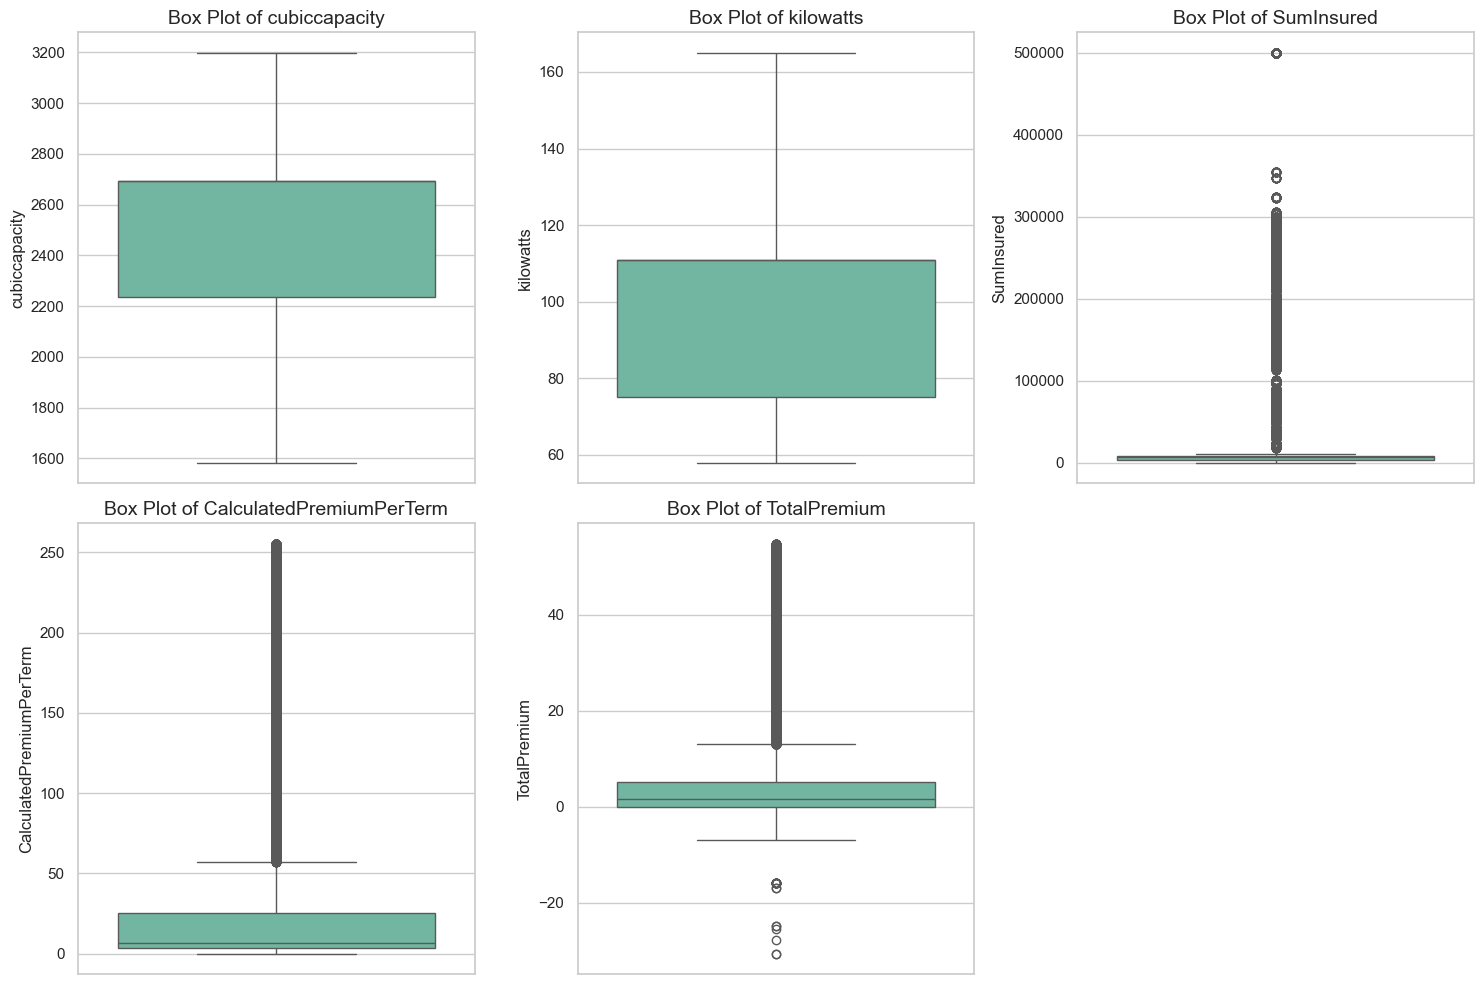

In [70]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual DataFrame name if it's different

# List of numerical columns
numerical_columns = ['cubiccapacity', 'kilowatts', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium']

# Set up the plotting aesthetics
sns.set(style="whitegrid")

# Create a box plot for each numerical column to detect outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the grid size as needed (2 rows, 3 columns here)
    sns.boxplot(data=df, y=column, palette="Set2")
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Removing outliers from the above three columns(i.e 'SumInsured', 'TotalPremium' and 'CalculatedPremiumPerTerm' )

In [71]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual DataFrame name if it's different

# List of columns to clean
columns_to_clean = ['SumInsured', 'TotalPremium', 'CalculatedPremiumPerTerm']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
        print(f"Column: {column}")
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        print(f"Number of outliers removed: {df.shape[0] - df_clean.shape[0]}")
    return df_clean

# Remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df, columns_to_clean)

# Optionally, print the shape of the DataFrame before and after outlier removal
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")


Column: SumInsured
Lower Bound: -2500.0
Upper Bound: 13500.0
Number of outliers removed: 53850
Column: TotalPremium
Lower Bound: -7.512236842104
Upper Bound: 12.52039473684
Number of outliers removed: 116110
Column: CalculatedPremiumPerTerm
Lower Bound: -4.936000000000001
Upper Bound: 15.792800000000002
Number of outliers removed: 201655
Original DataFrame shape: (586200, 52)
Cleaned DataFrame shape: (384545, 52)


In [72]:
df.to_csv('../dvc/data/dataset.csv',index=False)

### Phase 6: Visualiztion
# Visualization

This code block generates three creative and informative plots that capture key insights from the exploratory data analysis (EDA).

1. **Trend of Average Total Premium Over Time**:
   - **Objective**: To visualize how the average total premium has evolved over time.
   - **Details**: The `TransactionMonth` column is converted to a datetime format, and the average total premium is calculated monthly. A line plot with markers is created to display these trends.

2. **Distribution of Insurance Cover Types**:
   - **Objective**: To show the frequency distribution of different insurance cover types.
   - **Details**: A bar plot is used to display the count of each cover type, making it easy to see the most and least common cover types.

3. **Correlation Heatmap**:
   - **Objective**: To examine the relationships between key numerical variables.
   - **Details**: A correlation matrix is computed for selected numerical columns, and a heatmap is plotted to visualize the strength and direction of correlations.


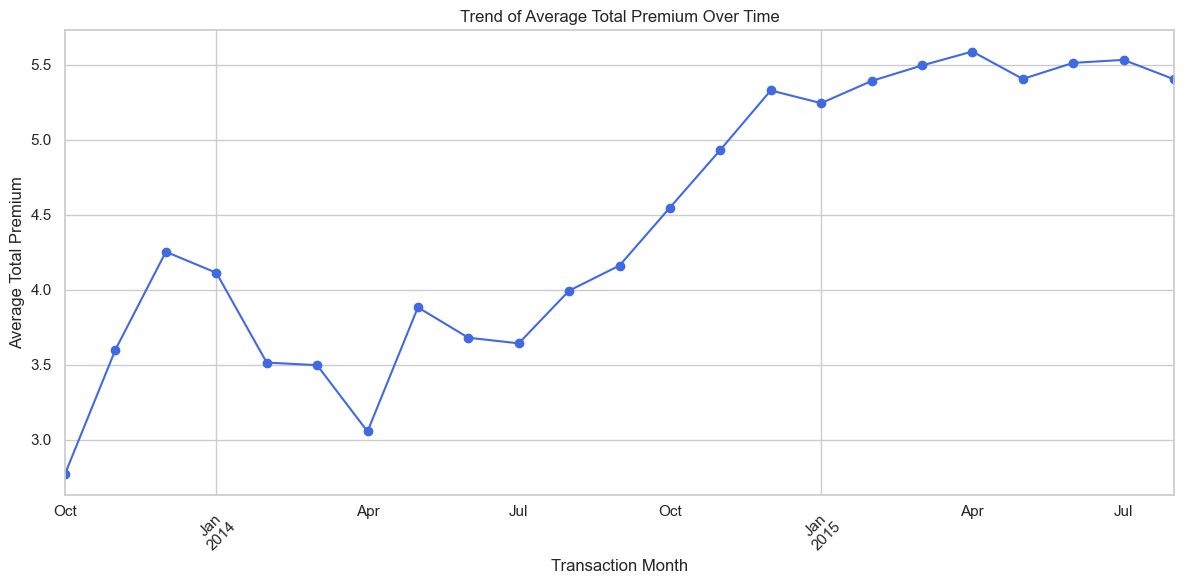

C:\Users\Beab\AppData\Local\Temp\ipykernel_13400\2842304276.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cover_type_counts.index, y=cover_type_counts.values, palette='viridis')


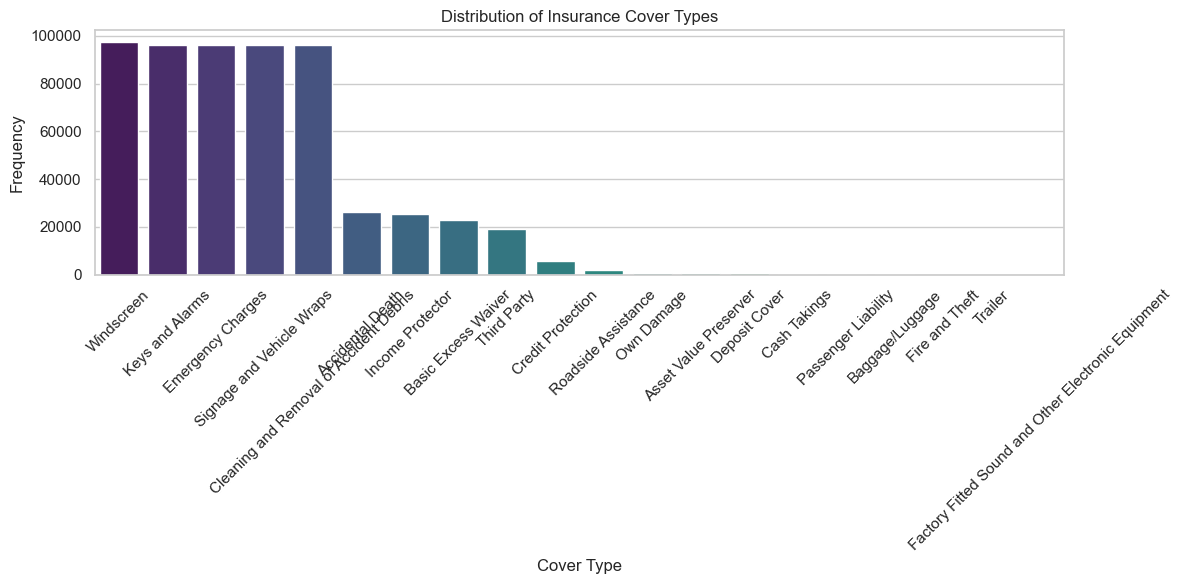

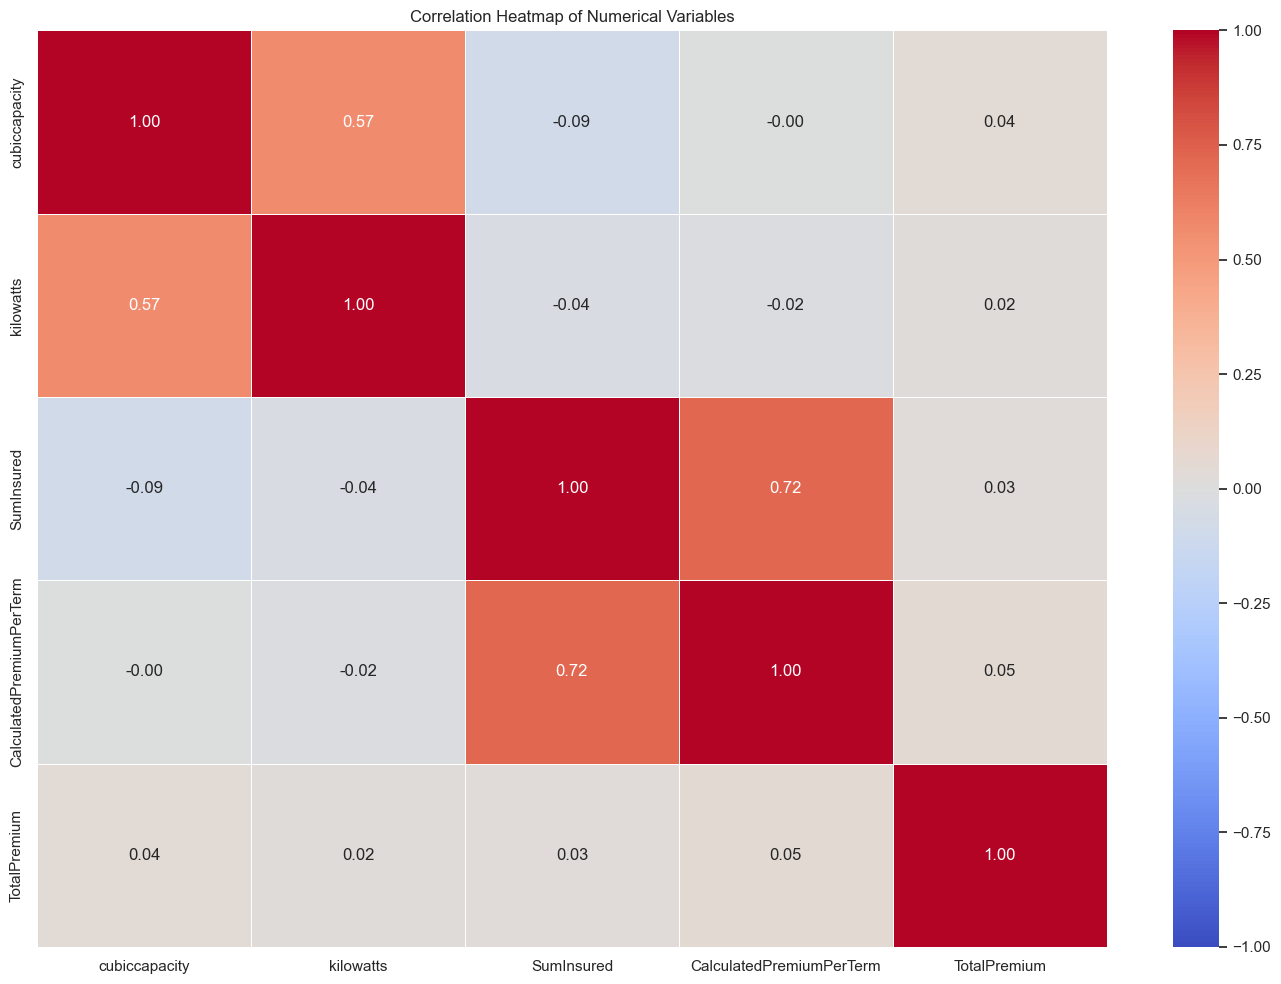

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# For demonstration purposes, let's create a sample DataFrame.
# df = pd.read_csv('your_data.csv')  # Uncomment this line to read your actual data.

# 1. Trend of Total Premium Over Time
plt.figure(figsize=(12, 6))
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly_premium = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalPremium'].mean()
monthly_premium.plot(kind='line', marker='o', color='royalblue')
plt.title('Trend of Average Total Premium Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('Average Total Premium')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribution of Insurance Cover Types
plt.figure(figsize=(12, 6))
cover_type_counts = df['CoverType'].value_counts()
sns.barplot(x=cover_type_counts.index, y=cover_type_counts.values, palette='viridis')
plt.title('Distribution of Insurance Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(14, 10))
num_cols = ['cubiccapacity', 'kilowatts', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium']
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()
